In [1]:
import pickle
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load the MFCC dataset
with open('mfcc_dataset.pkl', 'rb') as mfcc_file:
    mfcc_dataset = pickle.load(mfcc_file)
    
# Load the spectrogram dataset
with open('spectrogram_dataset.pkl', 'rb') as spectrogram_file:
    spectrogram_dataset = pickle.load(spectrogram_file)
    


In [3]:
print(spectrogram_dataset[0])


{'file_id': 'W1XD0EGO', 'sample_rate': 16000, 'start_sec': 0, 'end_sec': 1, 'spectrogram': array([[-8.287623 , -8.287623 , -8.287623 , ..., -2.829914 , -2.9057107,
        -2.9057107],
       [-8.287623 , -8.287623 , -8.287623 , ..., -2.9327095, -2.9627967,
        -2.9627967],
       [-8.287623 , -8.287623 , -8.287623 , ..., -3.37057  , -3.3034296,
        -3.3034296],
       ...,
       [-8.287623 , -8.287623 , -8.287623 , ..., -8.287623 , -8.287623 ,
        -8.287623 ],
       [-8.287623 , -8.287623 , -8.287623 , ..., -8.287623 , -8.287623 ,
        -8.287623 ],
       [-8.287623 , -8.287623 , -8.287623 , ..., -8.281083 , -8.2801485,
        -8.2801485]], dtype=float32), 'action': 'c115'}


In [4]:
class_distribution = {}
for item in spectrogram_dataset:
    action = item['action']
    if action in class_distribution:
        class_distribution[action] += 1
    else:
        class_distribution[action] = 1

class_distribution_sorted = dict(sorted(class_distribution.items(), key=lambda item: item[1], reverse=True))

print(class_distribution_sorted)

{'no_action': 23256, 'c154': 3101, 'c059': 2886, 'c151': 2108, 'c107': 2103, 'c061': 2044, 'c011': 1935, 'c152': 1701, 'c015': 1520, 'c097': 1516, 'c106': 1441, 'c156': 1416, 'c009': 1341, 'c118': 1308, 'c127': 1284, 'c063': 1245, 'c016': 1172, 'c026': 1166, 'c000': 1158, 'c033': 1157, 'c110': 1124, 'c125': 1114, 'c135': 1109, 'c123': 1089, 'c032': 1035, 'c109': 1004, 'c149': 1003, 'c008': 958, 'c115': 941, 'c132': 937, 'c062': 927, 'c020': 909, 'c113': 895, 'c141': 891, 'c070': 844, 'c001': 839, 'c006': 813, 'c098': 788, 'c038': 777, 'c119': 764, 'c002': 751, 'c147': 743, 'c014': 723, 'c065': 697, 'c126': 687, 'c076': 686, 'c051': 681, 'c081': 673, 'c096': 669, 'c040': 664, 'c102': 659, 'c153': 655, 'c012': 640, 'c004': 637, 'c112': 612, 'c052': 604, 'c145': 600, 'c120': 596, 'c021': 572, 'c134': 564, 'c146': 561, 'c114': 551, 'c067': 527, 'c155': 526, 'c034': 525, 'c035': 524, 'c030': 505, 'c137': 498, 'c037': 490, 'c054': 482, 'c082': 455, 'c150': 446, 'c071': 445, 'c017': 445, 'c08

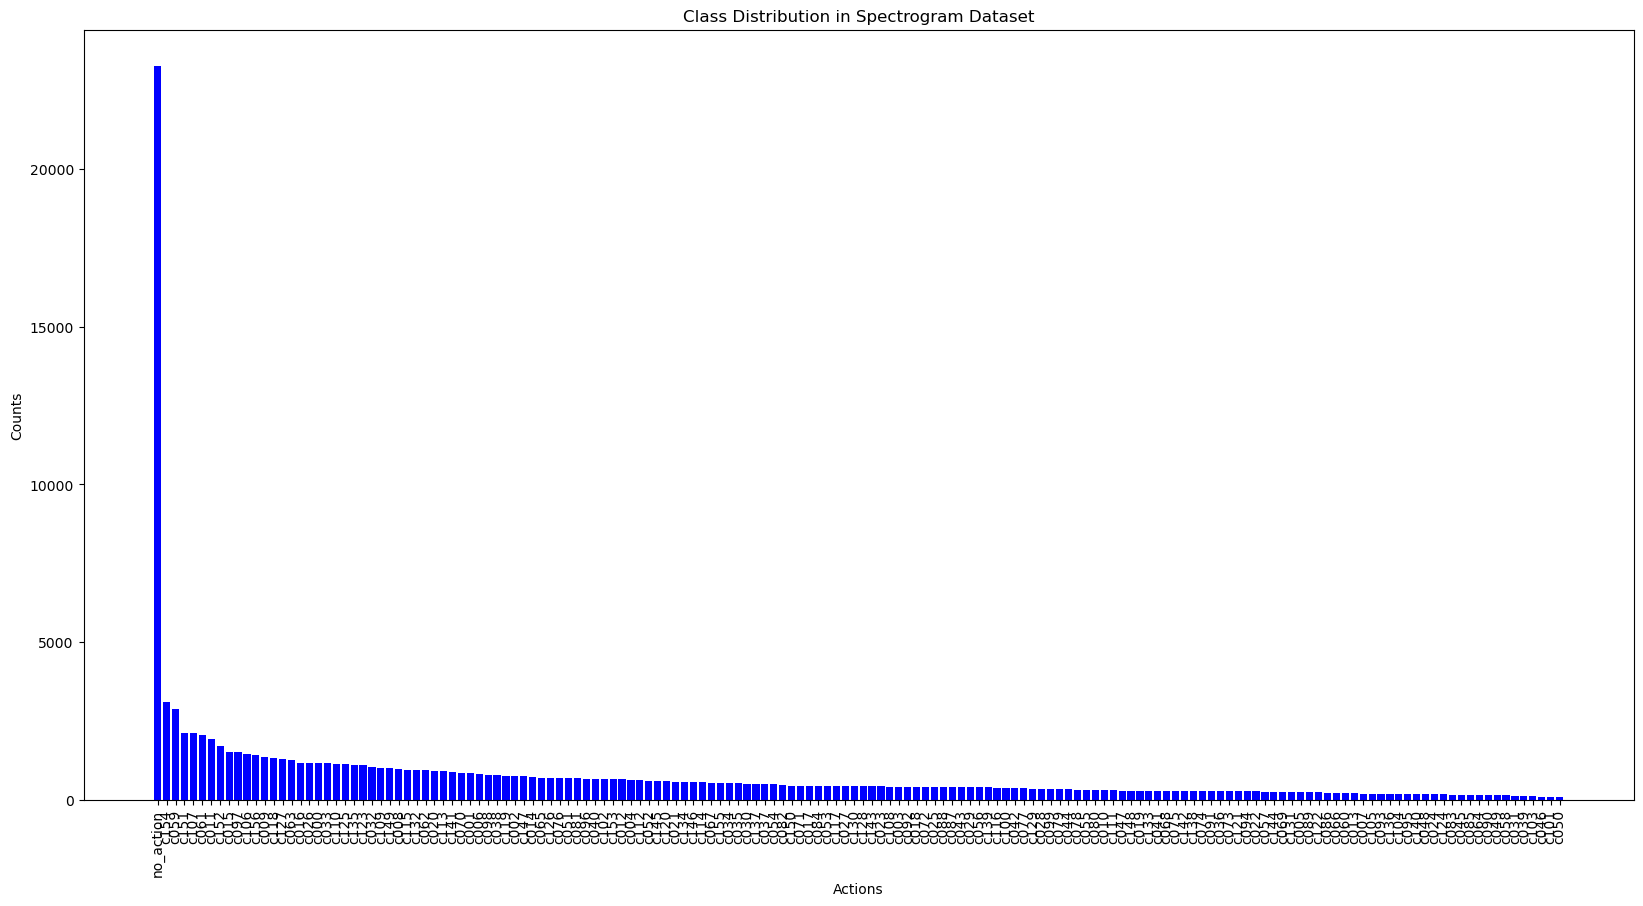

In [5]:


# Extracting keys and values for plotting
actions = list(class_distribution_sorted.keys())
counts = list(class_distribution_sorted.values())

# Creating the bar plot
plt.figure(figsize=(20, 10))  # Adjust the size as needed
plt.bar(actions, counts, color='blue')
plt.xlabel('Actions')
plt.ylabel('Counts')
plt.title('Class Distribution in Spectrogram Dataset')
plt.xticks(rotation=90)  # Rotates the x labels to prevent overlap
plt.show()


In [6]:
unique_labels = set()

for item in spectrogram_dataset:
    action = item['action']
    unique_labels.add(action)

sorted_labels = sorted(unique_labels)
print(sorted_labels)

['c000', 'c001', 'c002', 'c003', 'c004', 'c005', 'c006', 'c007', 'c008', 'c009', 'c010', 'c011', 'c012', 'c013', 'c014', 'c015', 'c016', 'c017', 'c018', 'c019', 'c020', 'c021', 'c022', 'c023', 'c024', 'c025', 'c026', 'c027', 'c028', 'c029', 'c030', 'c031', 'c032', 'c033', 'c034', 'c035', 'c036', 'c037', 'c038', 'c039', 'c040', 'c041', 'c042', 'c043', 'c044', 'c045', 'c046', 'c047', 'c048', 'c049', 'c050', 'c051', 'c052', 'c053', 'c054', 'c055', 'c056', 'c057', 'c058', 'c059', 'c060', 'c061', 'c062', 'c063', 'c064', 'c065', 'c066', 'c067', 'c068', 'c069', 'c070', 'c071', 'c072', 'c073', 'c074', 'c075', 'c076', 'c077', 'c078', 'c079', 'c080', 'c081', 'c082', 'c083', 'c084', 'c085', 'c086', 'c087', 'c088', 'c089', 'c090', 'c091', 'c092', 'c093', 'c094', 'c095', 'c096', 'c097', 'c098', 'c099', 'c100', 'c101', 'c102', 'c103', 'c104', 'c105', 'c106', 'c107', 'c108', 'c109', 'c110', 'c111', 'c112', 'c113', 'c114', 'c115', 'c116', 'c117', 'c118', 'c119', 'c120', 'c121', 'c122', 'c123', 'c124',

In [7]:
num_classes = len(sorted_labels)
print(num_classes)

158


In [8]:
label_to_int = {label: i for i, label in enumerate(sorted_labels)}
print(label_to_int)

{'c000': 0, 'c001': 1, 'c002': 2, 'c003': 3, 'c004': 4, 'c005': 5, 'c006': 6, 'c007': 7, 'c008': 8, 'c009': 9, 'c010': 10, 'c011': 11, 'c012': 12, 'c013': 13, 'c014': 14, 'c015': 15, 'c016': 16, 'c017': 17, 'c018': 18, 'c019': 19, 'c020': 20, 'c021': 21, 'c022': 22, 'c023': 23, 'c024': 24, 'c025': 25, 'c026': 26, 'c027': 27, 'c028': 28, 'c029': 29, 'c030': 30, 'c031': 31, 'c032': 32, 'c033': 33, 'c034': 34, 'c035': 35, 'c036': 36, 'c037': 37, 'c038': 38, 'c039': 39, 'c040': 40, 'c041': 41, 'c042': 42, 'c043': 43, 'c044': 44, 'c045': 45, 'c046': 46, 'c047': 47, 'c048': 48, 'c049': 49, 'c050': 50, 'c051': 51, 'c052': 52, 'c053': 53, 'c054': 54, 'c055': 55, 'c056': 56, 'c057': 57, 'c058': 58, 'c059': 59, 'c060': 60, 'c061': 61, 'c062': 62, 'c063': 63, 'c064': 64, 'c065': 65, 'c066': 66, 'c067': 67, 'c068': 68, 'c069': 69, 'c070': 70, 'c071': 71, 'c072': 72, 'c073': 73, 'c074': 74, 'c075': 75, 'c076': 76, 'c077': 77, 'c078': 78, 'c079': 79, 'c080': 80, 'c081': 81, 'c082': 82, 'c083': 83, '

In [9]:
# Calculate the total number of samples
total_samples = sum(class_distribution_sorted.values())

# Get the number of classes
num_classes = len(class_distribution_sorted)

# Calculate class weights using the new formula
class_weights = {class_label: total_samples / (num_classes * count) 
                 for class_label, count in class_distribution_sorted.items()}

# Create a list of weights in the order of sorted labels
weights = [class_weights[label] for label in sorted_labels]


In [10]:
print(total_samples)

116873


In [11]:
# Convert the list of weights to a tensor
weight_tensor = torch.FloatTensor(weights)

print(weight_tensor)

tensor([0.6388, 0.8816, 0.9850, 1.7910, 1.1612, 3.0693, 0.9098, 3.8526, 0.7721,
        0.5516, 2.5507, 0.3823, 1.1558, 3.6619, 1.0231, 0.4866, 0.6311, 1.6623,
        1.8130, 2.6231, 0.8138, 1.2932, 2.8671, 1.7528, 4.5661, 1.8585, 0.6344,
        1.6735, 2.2280, 1.9015, 1.4648, 6.0138, 0.7147, 0.6393, 1.4090, 1.4116,
        2.7601, 1.5096, 0.9520, 6.1132, 1.1140, 2.6898, 1.9725, 1.8774, 2.3044,
        4.6817, 8.8060, 2.6231, 4.5661, 5.4793, 9.6065, 1.0862, 1.2247, 1.6698,
        1.5347, 2.3408, 1.9163, 2.9588, 5.5617, 0.2563, 3.5563, 0.3619, 0.7980,
        0.5941, 4.8665, 1.0613, 3.4088, 1.4036, 2.7095, 3.0069, 0.8764, 1.6623,
        1.8493, 2.7704, 2.7396, 2.7195, 1.0783, 2.0377, 2.3261, 2.2621, 2.5507,
        1.0991, 1.6257, 4.6231, 1.6660, 4.7417, 3.3320, 1.8774, 1.8632, 3.2161,
        4.9314, 2.7498, 1.7998, 3.9556, 2.8450, 4.3257, 1.1057, 0.4879, 0.9387,
        2.2415, 1.9725, 9.1321, 1.1225, 7.3238, 4.3006, 3.8728, 0.5133, 0.3517,
        1.7867, 0.7368, 0.6581, 2.5595, 

In [12]:
labels = [item['action'] for item in spectrogram_dataset]

In [13]:
# Preprocessing: Prepare labels and split dataset
labels = [item['action'] for item in spectrogram_dataset]
label_to_int = {label: i for i, label in enumerate(set(labels))}
int_labels = [label_to_int[label] for label in labels]


In [14]:
# Splitting dataset
train_data, temp_data, train_labels, temp_labels = train_test_split(
    spectrogram_dataset, int_labels, test_size=0.2, random_state=42, stratify=int_labels)

val_data, test_data, val_labels, test_labels = train_test_split(
    temp_data, temp_labels, test_size=0.5, random_state=42, stratify=temp_labels)

print(f"training data size: {len(train_data)}")
print(f"validation data size: {len(val_data)}")
print(f"testing data size: {len(test_data)}")


training data size: 93498
validation data size: 11687
testing data size: 11688


In [15]:
class AudioCNN(nn.Module):
    def __init__(self, num_classes):
        super(AudioCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.relu = nn.ReLU()

        # Manually calculated flattened features
        self.flattened_features = 64 * 128 * 16

        self.fc = nn.Linear(self.flattened_features, num_classes)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)  # Flatten the tensor for the fully connected layer
        x = self.fc(x)
        return x

In [16]:
# Define the function to calculate top-k accuracy
def top_k_accuracy(outputs, labels, k=5):
    _, pred = outputs.topk(k, 1, True, True)
    pred = pred.t()
    correct = pred.eq(labels.view(1, -1).expand_as(pred))
    topk_correct = correct[:k].reshape(-1).float().sum(0, keepdim=True)
    return topk_correct.item()

In [25]:
torch.cuda.set_device(2)

# Instantiate the model
num_classes = len(set(train_labels))
model = AudioCNN(num_classes)

In [26]:
# Dataset Class
class SpectrogramDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        spectrogram = self.data[idx]['spectrogram']
        label = self.labels[idx]
        return torch.tensor(spectrogram, dtype=torch.float32).unsqueeze(0), label

batch_size = 16
    
# DataLoader
train_dataset = SpectrogramDataset(train_data, train_labels)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataset = SpectrogramDataset(val_data, train_labels)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_dataset = SpectrogramDataset(test_data, test_labels)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [27]:
# Training configurations
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)
num_epochs = 25
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

AudioCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (fc): Linear(in_features=131072, out_features=158, bias=True)
)

In [28]:
# Initialize lists to keep track of loss and accuracy for plotting
train_losses = []
val_losses = []
val_accuracies = []
val_top1_accuracies = []
val_top5_accuracies = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for inputs, labels in tqdm(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    avg_train_loss = train_loss / len(train_loader)
    train_losses.append(avg_train_loss)  # Record training loss
    print(f"Epoch {epoch + 1}/{num_epochs}, Training Loss: {avg_train_loss}")
    torch.cuda.empty_cache()

    # Validation
    model.eval()
    val_loss = 0
    val_correct = 0
    val_top1_correct = 0
    val_top5_correct = 0
    val_total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

            # Calculate top-1 accuracy
            val_top1_correct += top_k_accuracy(outputs, labels, k=1)
            # Calculate top-5 accuracy
            val_top5_correct += top_k_accuracy(outputs, labels, k=5)

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * val_correct / val_total
    avg_val_top1_accuracy = 100 * val_top1_correct / val_total
    avg_val_top5_accuracy = 100 * val_top5_correct / val_total

    # Record validation metrics
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)
    val_top1_accuracies.append(avg_val_top1_accuracy)
    val_top5_accuracies.append(avg_val_top5_accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Validation Loss: {avg_val_loss}, Validation Accuracy: {val_accuracy}%, Top-1 Accuracy: {avg_val_top1_accuracy}%, Top-5 Accuracy: {avg_val_top5_accuracy}%")
    torch.cuda.empty_cache()

100%|███████████████████████████████████████| 5844/5844 [01:16<00:00, 76.54it/s]


Epoch 1/25, Training Loss: 4.449237527135788
Epoch 1/25, Validation Loss: 4.351465943737004, Validation Accuracy: 19.235047488662616%, Top-1 Accuracy: 19.235047488662616%, Top-5 Accuracy: 27.860015401728415%


100%|███████████████████████████████████████| 5844/5844 [01:16<00:00, 76.27it/s]


Epoch 2/25, Training Loss: 4.324930786025761
Epoch 2/25, Validation Loss: 4.3524498567698595, Validation Accuracy: 19.235047488662616%, Top-1 Accuracy: 19.235047488662616%, Top-5 Accuracy: 27.731667664926842%


100%|███████████████████████████████████████| 5844/5844 [01:17<00:00, 75.88it/s]


Epoch 3/25, Training Loss: 4.324881118670626
Epoch 3/25, Validation Loss: 4.352463184074892, Validation Accuracy: 19.235047488662616%, Top-1 Accuracy: 19.235047488662616%, Top-5 Accuracy: 27.860015401728415%


100%|███████████████████████████████████████| 5844/5844 [01:17<00:00, 74.94it/s]


Epoch 4/25, Training Loss: 4.324791858287644
Epoch 4/25, Validation Loss: 4.3538163350805865, Validation Accuracy: 19.235047488662616%, Top-1 Accuracy: 19.235047488662616%, Top-5 Accuracy: 28.065371780610935%


100%|███████████████████████████████████████| 5844/5844 [01:17<00:00, 75.66it/s]


Epoch 5/25, Training Loss: 4.325034318273807
Epoch 5/25, Validation Loss: 4.351404443811294, Validation Accuracy: 19.235047488662616%, Top-1 Accuracy: 19.235047488662616%, Top-5 Accuracy: 28.099597843758023%


100%|███████████████████████████████████████| 5844/5844 [01:17<00:00, 75.48it/s]


Epoch 6/25, Training Loss: 4.3248914730295915
Epoch 6/25, Validation Loss: 4.352343810729876, Validation Accuracy: 19.235047488662616%, Top-1 Accuracy: 19.235047488662616%, Top-5 Accuracy: 27.860015401728415%


100%|███████████████████████████████████████| 5844/5844 [01:16<00:00, 76.19it/s]


Epoch 7/25, Training Loss: 4.325056529673382
Epoch 7/25, Validation Loss: 4.351723296208519, Validation Accuracy: 19.235047488662616%, Top-1 Accuracy: 19.235047488662616%, Top-5 Accuracy: 28.099597843758023%


100%|███████████████████████████████████████| 5844/5844 [01:16<00:00, 75.93it/s]


Epoch 8/25, Training Loss: 4.324934531612644
Epoch 8/25, Validation Loss: 4.350871986957973, Validation Accuracy: 19.235047488662616%, Top-1 Accuracy: 19.235047488662616%, Top-5 Accuracy: 28.099597843758023%


100%|███████████████████████████████████████| 5844/5844 [01:17<00:00, 75.77it/s]


Epoch 9/25, Training Loss: 4.324897269938271
Epoch 9/25, Validation Loss: 4.351719615234396, Validation Accuracy: 19.235047488662616%, Top-1 Accuracy: 19.235047488662616%, Top-5 Accuracy: 28.099597843758023%


100%|███████████████████████████████████████| 5844/5844 [01:17<00:00, 75.37it/s]


Epoch 10/25, Training Loss: 4.324833662847719
Epoch 10/25, Validation Loss: 4.352089227632034, Validation Accuracy: 19.235047488662616%, Top-1 Accuracy: 19.235047488662616%, Top-5 Accuracy: 27.731667664926842%


100%|███████████████████████████████████████| 5844/5844 [01:17<00:00, 75.50it/s]


Epoch 11/25, Training Loss: 4.3247869487987
Epoch 11/25, Validation Loss: 4.353099935195026, Validation Accuracy: 19.235047488662616%, Top-1 Accuracy: 19.235047488662616%, Top-5 Accuracy: 27.731667664926842%


100%|███████████████████████████████████████| 5844/5844 [01:17<00:00, 75.11it/s]


Epoch 12/25, Training Loss: 4.324885301358238
Epoch 12/25, Validation Loss: 4.352590348586827, Validation Accuracy: 19.235047488662616%, Top-1 Accuracy: 19.235047488662616%, Top-5 Accuracy: 28.099597843758023%


100%|███████████████████████████████████████| 5844/5844 [01:17<00:00, 75.80it/s]


Epoch 13/25, Training Loss: 4.324969253949643
Epoch 13/25, Validation Loss: 4.3521286267099235, Validation Accuracy: 19.235047488662616%, Top-1 Accuracy: 19.235047488662616%, Top-5 Accuracy: 28.099597843758023%


100%|███████████████████████████████████████| 5844/5844 [01:17<00:00, 75.72it/s]


Epoch 14/25, Training Loss: 4.32479017071329
Epoch 14/25, Validation Loss: 4.3531090978395435, Validation Accuracy: 19.235047488662616%, Top-1 Accuracy: 19.235047488662616%, Top-5 Accuracy: 28.099597843758023%


100%|███████████████████████████████████████| 5844/5844 [01:17<00:00, 75.66it/s]


Epoch 15/25, Training Loss: 4.3250581363877725
Epoch 15/25, Validation Loss: 4.352099205009262, Validation Accuracy: 19.235047488662616%, Top-1 Accuracy: 19.235047488662616%, Top-5 Accuracy: 27.731667664926842%


100%|███████████████████████████████████████| 5844/5844 [01:17<00:00, 75.65it/s]


Epoch 16/25, Training Loss: 4.324793007788309
Epoch 16/25, Validation Loss: 4.353008076854346, Validation Accuracy: 19.235047488662616%, Top-1 Accuracy: 19.235047488662616%, Top-5 Accuracy: 27.731667664926842%


100%|███████████████████████████████████████| 5844/5844 [01:17<00:00, 75.39it/s]


Epoch 17/25, Training Loss: 4.32476234839927
Epoch 17/25, Validation Loss: 4.352849425760731, Validation Accuracy: 19.235047488662616%, Top-1 Accuracy: 19.235047488662616%, Top-5 Accuracy: 27.731667664926842%


100%|███████████████████████████████████████| 5844/5844 [01:18<00:00, 74.50it/s]


Epoch 18/25, Training Loss: 4.324912189417388
Epoch 18/25, Validation Loss: 4.352211484504626, Validation Accuracy: 19.235047488662616%, Top-1 Accuracy: 19.235047488662616%, Top-5 Accuracy: 28.099597843758023%


100%|███████████████████████████████████████| 5844/5844 [01:17<00:00, 75.72it/s]


Epoch 19/25, Training Loss: 4.324885083215845
Epoch 19/25, Validation Loss: 4.352900762727583, Validation Accuracy: 19.235047488662616%, Top-1 Accuracy: 19.235047488662616%, Top-5 Accuracy: 27.731667664926842%


100%|███████████████████████████████████████| 5844/5844 [01:16<00:00, 76.09it/s]


Epoch 20/25, Training Loss: 4.324710628743207
Epoch 20/25, Validation Loss: 4.3536888329992545, Validation Accuracy: 19.235047488662616%, Top-1 Accuracy: 19.235047488662616%, Top-5 Accuracy: 27.731667664926842%


100%|███████████████████████████████████████| 5844/5844 [01:17<00:00, 75.50it/s]


Epoch 21/25, Training Loss: 4.324810584998147
Epoch 21/25, Validation Loss: 4.353107971629758, Validation Accuracy: 19.235047488662616%, Top-1 Accuracy: 19.235047488662616%, Top-5 Accuracy: 28.099597843758023%


100%|███████████████████████████████████████| 5844/5844 [01:17<00:00, 75.82it/s]


Epoch 22/25, Training Loss: 4.324860933584191
Epoch 22/25, Validation Loss: 4.35229343232965, Validation Accuracy: 19.235047488662616%, Top-1 Accuracy: 19.235047488662616%, Top-5 Accuracy: 28.099597843758023%


100%|███████████████████████████████████████| 5844/5844 [01:17<00:00, 75.66it/s]


Epoch 23/25, Training Loss: 4.324875003503333
Epoch 23/25, Validation Loss: 4.352610831384619, Validation Accuracy: 19.235047488662616%, Top-1 Accuracy: 19.235047488662616%, Top-5 Accuracy: 27.731667664926842%


100%|███████████████████████████████████████| 5844/5844 [01:17<00:00, 75.80it/s]


Epoch 24/25, Training Loss: 4.3248723244357
Epoch 24/25, Validation Loss: 4.3522969547929256, Validation Accuracy: 19.235047488662616%, Top-1 Accuracy: 19.235047488662616%, Top-5 Accuracy: 28.099597843758023%


100%|███████████████████████████████████████| 5844/5844 [01:17<00:00, 75.87it/s]


Epoch 25/25, Training Loss: 4.324835300282368
Epoch 25/25, Validation Loss: 4.3521169820334125, Validation Accuracy: 19.235047488662616%, Top-1 Accuracy: 19.235047488662616%, Top-5 Accuracy: 28.099597843758023%


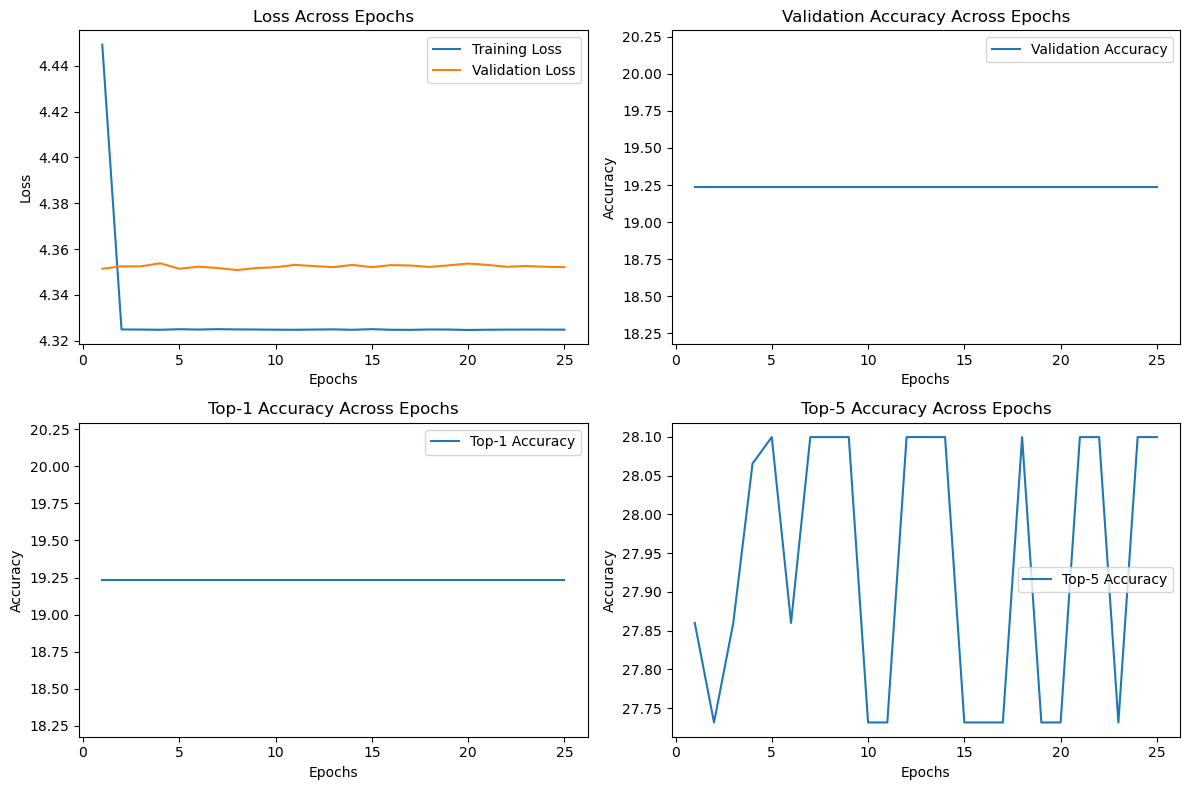

In [29]:
# Plotting
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Across Epochs')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(range(1, num_epochs+1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Across Epochs')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(range(1, num_epochs+1), val_top1_accuracies, label='Top-1 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Top-1 Accuracy Across Epochs')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(range(1, num_epochs+1), val_top5_accuracies, label='Top-5 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Top-5 Accuracy Across Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Testing loop
model.eval()
total = 0
correct = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total}%')